## 1. Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import json


from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.stem import *
from nltk.stem.snowball import SnowballStemmer


tqdm.pandas()

## 2. Load data

In [19]:
PATH_DATA = 'Data/twitter-datasets/'
PATH = 'DATA/'

t_pos = pd.read_fwf(PATH_DATA + 'train_pos_full.txt', header = None, names = ['Tweet'], colspecs = [(0,280)])
t_neg = pd.read_fwf(PATH_DATA + 'train_neg_full.txt', header = None, names = ['Tweet'], colspecs = [(0,280)])



## 3. Counting number of words 

In [20]:
t_pos['count_word'] = t_pos['Tweet'].progress_apply(lambda x : len(x.split()))

100%|██████████| 1250000/1250000 [00:03<00:00, 392967.85it/s]


In [21]:
t_neg['count_word'] = t_neg['Tweet'].progress_apply(lambda x : len(x.split()))

100%|██████████| 1250000/1250000 [00:03<00:00, 395881.95it/s]


## 4. Counting number of characters

In [22]:
t_pos['count_characters'] = t_pos['Tweet'].progress_apply(lambda x : len(x))

100%|██████████| 1250000/1250000 [00:01<00:00, 741397.20it/s]


In [23]:
t_neg['count_characters'] = t_neg['Tweet'].progress_apply(lambda x : len(x))

100%|██████████| 1250000/1250000 [00:01<00:00, 722642.44it/s]


In [24]:
t_pos.head()

,Tweet,count_word,count_characters
0,<user> i dunno justin read my mention or not ....,27,127
1,"because your logic is so dumb , i won't even c...",21,91
2,""" <user> just put casper in a box ! "" looved t...",15,69
3,<user> <user> thanks sir > > don't trip lil ma...,17,78
4,visiting my brother tmr is the bestest birthda...,13,66


## 5. Replacing contractions and lowercasing and stemming
https://stackoverflow.com/questions/46786211/counting-the-frequency-of-words-in-a-pandas-data-frame

In [25]:
t_pos['Tweet'] = t_pos['Tweet'].apply(lambda x : x.lower())
t_neg['Tweet'] = t_neg['Tweet'].apply(lambda x : x.lower())

In [26]:
t_pos.head(100)

,Tweet,count_word,count_characters
0,<user> i dunno justin read my mention or not ....,27,127
1,"because your logic is so dumb , i won't even c...",21,91
2,""" <user> just put casper in a box ! "" looved t...",15,69
3,<user> <user> thanks sir > > don't trip lil ma...,17,78
4,visiting my brother tmr is the bestest birthda...,13,66
...,...,...,...
95,<user> it's once every 24 hours,6,31
96,<user> follow <user> cos she's a fully sick dog,9,47
97,<user> <user> thanks for the super sexy gold s...,15,78
98,<user> <user> <user> <user> <user> <user> <use...,11,72


In [27]:
def load_contractions():
    contraction_list = json.loads(open(PATH + 'english_contractions.json', 'r').read())
    contraction_list['ur'] = "your"
    contraction_list['ya'] = "you"
    return contraction_list

def remove_contractions(sentence, contraction_list):
    sent_split = sentence.split(" ")
    sent_wo = [contraction_list[word] if word in contraction_list else word for word in sent_split]
    return " ".join(sent_wo)

def remove_contractions_df(df, contraction_list,  col = 'Tweet'):
    df[col + '_cont'] = df[col].progress_apply(lambda x : remove_contractions(x, contraction_list))
    return df 

In [28]:
slang_list = json.loads(open(PATH + 'slang.json', 'r').read())

def remove_slang(sentence):
    sent_split = sentence.split(" ")
    sent_wo = [slang_list[word] if word in slang_list else word for word in sent_split]
    return " ".join(sent_wo)

def remove_slang_df(df, col = 'Tweet_cont'):
    df[col] = df[col].progress_apply(lambda x : remove_slang(x))
    return df

In [29]:
contract_ls = load_contractions()

remove_contractions_df(t_pos, contract_ls)
remove_contractions_df(t_neg, contract_ls)


100%|██████████| 1250000/1250000 [00:06<00:00, 182064.62it/s]


,Tweet,count_word,count_characters,Tweet_cont
0,vinco tresorpack 6 ( difficulty 10 of 10 objec...,21,122,vinco tresorpack 6 ( difficulty 10 of 10 objec...
1,glad i dot have taks tomorrow ! ! #thankful #s...,10,52,glad i dot have taks tomorrow ! ! #thankful #s...
2,1-3 vs celtics in the regular season = were fu...,17,82,1-3 vs celtics in the regular season = we are ...
3,<user> i could actually kill that girl i'm so ...,13,57,<user> i could actually kill that girl I am so...
4,<user> <user> <user> i find that very hard to ...,12,63,<user> <user> <user> i find that very hard to ...
...,...,...,...,...
1249995,im so sorry ! <user> & to <user> & <user> u gu...,16,69,I am so sorry ! <user> & to <user> & <user> u ...
1249996,i can't find food coloring anywhere,6,35,i cannot find food coloring anywhere
1249997,<user> same here ! ! but tort ! ! wonder why y...,27,131,<user> same here ! ! but tort ! ! wonder why y...
1249998,keyless entry remote fob clicker for 2005 buic...,22,120,keyless entry remote fob clicker for 2005 buic...


In [30]:
t_pos.Tweet_cont.str.islower()

0           True
1           True
2           True
3           True
4           True
           ...  
1249995     True
1249996     True
1249997     True
1249998     True
1249999    False
Name: Tweet_cont, Length: 1250000, dtype: bool

In [31]:
t_pos.Tweet_cont.iloc[99998]

'<user> I am so excited for tomorrow ! look out for two leprechauns ! xx'

In [32]:
remove_slang_df(t_pos)
remove_slang_df(t_neg)

100%|██████████| 1250000/1250000 [00:08<00:00, 148618.21it/s]


,Tweet,count_word,count_characters,Tweet_cont
0,vinco tresorpack 6 ( difficulty 10 of 10 objec...,21,122,vinco tresorpack 6 ( difficulty 10 of 10 objec...
1,glad i dot have taks tomorrow ! ! #thankful #s...,10,52,glad i dot have taks tomorrow ! ! #thankful #s...
2,1-3 vs celtics in the regular season = were fu...,17,82,1-3 vs celtics in the regular season = we are ...
3,<user> i could actually kill that girl i'm so ...,13,57,<user> i could actually kill that girl I am so...
4,<user> <user> <user> i find that very hard to ...,12,63,<user> <user> <user> i find that very hard to ...
...,...,...,...,...
1249995,im so sorry ! <user> & to <user> & <user> u gu...,16,69,I am so sorry ! <user> & to <user> & <user> yo...
1249996,i can't find food coloring anywhere,6,35,i cannot find food coloring anywhere
1249997,<user> same here ! ! but tort ! ! wonder why y...,27,131,<user> same here ! ! but tort ! ! wonder why y...
1249998,keyless entry remote fob clicker for 2005 buic...,22,120,keyless entry remote fresh off the boat clicke...


In [33]:
t_pos['Tweet_cont'] = t_pos['Tweet_cont'].apply(lambda x : x.lower())
t_neg['Tweet_cont'] = t_neg['Tweet_cont'].apply(lambda x : x.lower())

In [34]:
t_pos.Tweet_cont.iloc[99998]

'<user> i am so excited for tomorrow ! look out for two leprechauns ! xx'

In [35]:
stemmer = SnowballStemmer("english")

def stem_word(sent):
    sent_sp = sent.split()
    st = [stemmer.stem(w) for w in sent_sp]
    return " ".join(st)

t_pos['Tweet_cont'] = t_pos['Tweet_cont'].progress_apply(lambda x : stem_word(x))
t_neg['Tweet_cont'] = t_neg['Tweet_cont'].progress_apply(lambda x : stem_word(x))

100%|██████████| 1250000/1250000 [04:51<00:00, 4292.01it/s]


## 6. Most frequent stop-words

In [36]:
nltk.download('stopwords')

def load_stopwords():
    all_stopwords = stopwords.words('english')
    all_stopwords.append('<user>')
    all_stopwords.append('<url>')
    all_stopwords.append('i')
    return all_stopwords

def remove_stopwords(sentence, all_stopwords):
    sent_split = sentence.split(" ")
    
    all_stopwords = set(all_stopwords) # set() heremakes it at least 10x faster
    sent_without_sw = [word for word in sent_split if not word in all_stopwords]
    no_sw = " ".join(sent_without_sw)
    return no_sw

def only_stopwords(sentence, all_stopwords):
    sent_split = sentence.split(" ")
    all_stopwords = set(all_stopwords)
    sw = [word for word in sent_split if word in all_stopwords]
    sw_j = " ".join(sw)
    return sw_j

def remove_stopwords_df(df, col = 'Tweet_cont'):
    df['no_sw'] = df[col].progress_apply(lambda x : remove_stopwords(x, all_stopwords))
    df['sw'] = df[col].progress_apply(lambda x : only_stopwords(x, all_stopwords))
    return df

all_stopwords = load_stopwords()
remove_stopwords_df(t_pos)
remove_stopwords_df(t_neg)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/clemencebarsi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 1250000/1250000 [00:14<00:00, 86328.79it/s]


,Tweet,count_word,count_characters,Tweet_cont,no_sw,sw
0,vinco tresorpack 6 ( difficulty 10 of 10 objec...,21,122,vinco tresorpack 6 ( difficulti 10 of 10 objec...,vinco tresorpack 6 ( difficulti 10 10 object :...,of and the this <url>
1,glad i dot have taks tomorrow ! ! #thankful #s...,10,52,glad i dot have tak tomorrow ! ! #thank #startho,glad dot tak tomorrow ! ! #thank #startho,i have
2,1-3 vs celtics in the regular season = were fu...,17,82,1-3 vs celtic in the regular season = we are f...,1-3 vs celtic regular season = fuck play playoff,in the we are if we them in the
3,<user> i could actually kill that girl i'm so ...,13,57,<user> i could actual kill that girl i am so s...,could actual kill girl sorri ! ! !,<user> i that i am so
4,<user> <user> <user> i find that very hard to ...,12,63,<user> <user> <user> i find that veri hard to ...,find veri hard believ afraid,<user> <user> <user> i that to i am
...,...,...,...,...,...,...
1249995,im so sorry ! <user> & to <user> & <user> u gu...,16,69,i am so sorri ! <user> & to <user> & <user> yo...,sorri ! & & guy ridicul ! >:/,i am so <user> to <user> <user> you are
1249996,i can't find food coloring anywhere,6,35,i cannot find food color anywher,cannot find food color anywher,i
1249997,<user> same here ! ! but tort ! ! wonder why y...,27,131,<user> same here ! ! but tort ! ! wonder whi y...,! ! tort ! ! wonder whi chose crime modul haha...,<user> same here but you over all the other to...
1249998,keyless entry remote fob clicker for 2005 buic...,22,120,keyless entri remot fresh off the boat clicker...,keyless entri remot fresh boat clicker 2005 bu...,off the for be by not <url>


In [37]:
t_pos.Tweet_cont.str.islower()


0          True
1          True
2          True
3          True
4          True
           ... 
1249995    True
1249996    True
1249997    True
1249998    True
1249999    True
Name: Tweet_cont, Length: 1250000, dtype: bool

In [38]:
count_pos_sw = t_pos.sw.str.split(expand = True).stack().value_counts()

In [39]:
count_neg_sw = t_neg.sw.str.split(expand = True).stack().value_counts()

In [40]:
count_pos_sw

<user>    1027186
i          639229
you        528273
to         393353
the        339442
           ...   
weren           2
hasn            2
hadn            1
being           1
you'll          1
Length: 143, dtype: int64

## 7. Most frequent special characters

In [41]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
import re

pattern = r'[0-9]'

from string import ascii_letters, digits, punctuation


def remove_punct_df(df, col = 'no_sw'):
    df['without_punc'] = df[col].progress_apply(lambda x :" ".join(tokenizer.tokenize(x)))
    df['punc'] = df[col].progress_apply(lambda x : re.sub(r'[^{}]+'.format(punctuation),' ',x))
    return df

In [42]:
remove_punct_df(t_pos)
remove_punct_df(t_neg)

100%|██████████| 1250000/1250000 [00:05<00:00, 218886.51it/s]


,Tweet,count_word,count_characters,Tweet_cont,no_sw,sw,without_punc,punc
0,vinco tresorpack 6 ( difficulty 10 of 10 objec...,21,122,vinco tresorpack 6 ( difficulti 10 of 10 objec...,vinco tresorpack 6 ( difficulti 10 10 object :...,of and the this <url>,vinco tresorpack 6 difficulti 10 10 object dis...,( : ...
1,glad i dot have taks tomorrow ! ! #thankful #s...,10,52,glad i dot have tak tomorrow ! ! #thank #startho,glad dot tak tomorrow ! ! #thank #startho,i have,glad dot tak tomorrow thank startho,! ! # #
2,1-3 vs celtics in the regular season = were fu...,17,82,1-3 vs celtic in the regular season = we are f...,1-3 vs celtic regular season = fuck play playoff,in the we are if we them in the,1 3 vs celtic regular season fuck play playoff,- =
3,<user> i could actually kill that girl i'm so ...,13,57,<user> i could actual kill that girl i am so s...,could actual kill girl sorri ! ! !,<user> i that i am so,could actual kill girl sorri,! ! !
4,<user> <user> <user> i find that very hard to ...,12,63,<user> <user> <user> i find that veri hard to ...,find veri hard believ afraid,<user> <user> <user> i that to i am,find veri hard believ afraid,
...,...,...,...,...,...,...,...,...
1249995,im so sorry ! <user> & to <user> & <user> u gu...,16,69,i am so sorri ! <user> & to <user> & <user> yo...,sorri ! & & guy ridicul ! >:/,i am so <user> to <user> <user> you are,sorri guy ridicul,! & & ! >:/
1249996,i can't find food coloring anywhere,6,35,i cannot find food color anywher,cannot find food color anywher,i,cannot find food color anywher,
1249997,<user> same here ! ! but tort ! ! wonder why y...,27,131,<user> same here ! ! but tort ! ! wonder whi y...,! ! tort ! ! wonder whi chose crime modul haha...,<user> same here but you over all the other to...,tort wonder whi chose crime modul hahaa tri im...,! ! ! ! ?
1249998,keyless entry remote fob clicker for 2005 buic...,22,120,keyless entri remot fresh off the boat clicker...,keyless entri remot fresh boat clicker 2005 bu...,off the for be by not <url>,keyless entri remot fresh boat clicker 2005 bu...,- ( ...


In [43]:
count_pos_punct = t_pos.punc.str.split(expand = True).stack().value_counts()
count_neg_punct = t_neg.punc.str.split(expand = True).stack().value_counts()

In [44]:
count_pos_punct

!       633765
.       398593
,       346296
#       217015
?       194681
         ...  
<->          1
>:-{         1
-'-          1
;{           1
]':          1
Length: 210, dtype: int64

## 8. Most frequent words without special characters and without stopwords

In [45]:
count_pos_no_punct_sw = t_pos.without_punc.str.split(expand = True).stack().value_counts()
count_neg_no_punct_sw = t_neg.without_punc.str.split(expand = True).stack().value_counts()


In [46]:
count_pos_no_punct_sw

love             111247
thank            108613
follow           105317
go                92135
rt                87664
                  ...  
voxlap                1
charlottetown         1
collegewish           1
scoreless             1
ewallet               1
Length: 224344, dtype: int64

In [47]:
count_neg_no_punct_sw 

frame            102690
go                98521
want              74474
get               63393
2                 60049
                  ...  
notahapybunni         1
60025                 1
jpot                  1
stamps                1
ajeb                  1
Length: 293889, dtype: int64

## 9. Plotting

In [48]:
value_neg = pd.DataFrame()

In [49]:
neg_no_punct_sw = count_neg_no_punct_sw.to_frame(name = 'nbr').head(10)
pos_no_punct_sw = count_pos_no_punct_sw.to_frame(name = 'nbr').head(10)

pos_punct = count_pos_punct.to_frame(name = 'nbr').head(10)
neg_punct = count_neg_punct.to_frame(name = 'nbr').head(10)

pos_sw = count_pos_sw.to_frame(name = 'nbr').head(10)
neg_sw = count_neg_sw.to_frame(name = 'nbr').head(10)

In [50]:
pos_sw

,nbr
<user>,1027186
i,639229
you,528273
to,393353
the,339442
a,269448
is,238692
it,229659
and,226325
my,225578


Text(0.25, -0.06, 'Most frequently appearing strings')

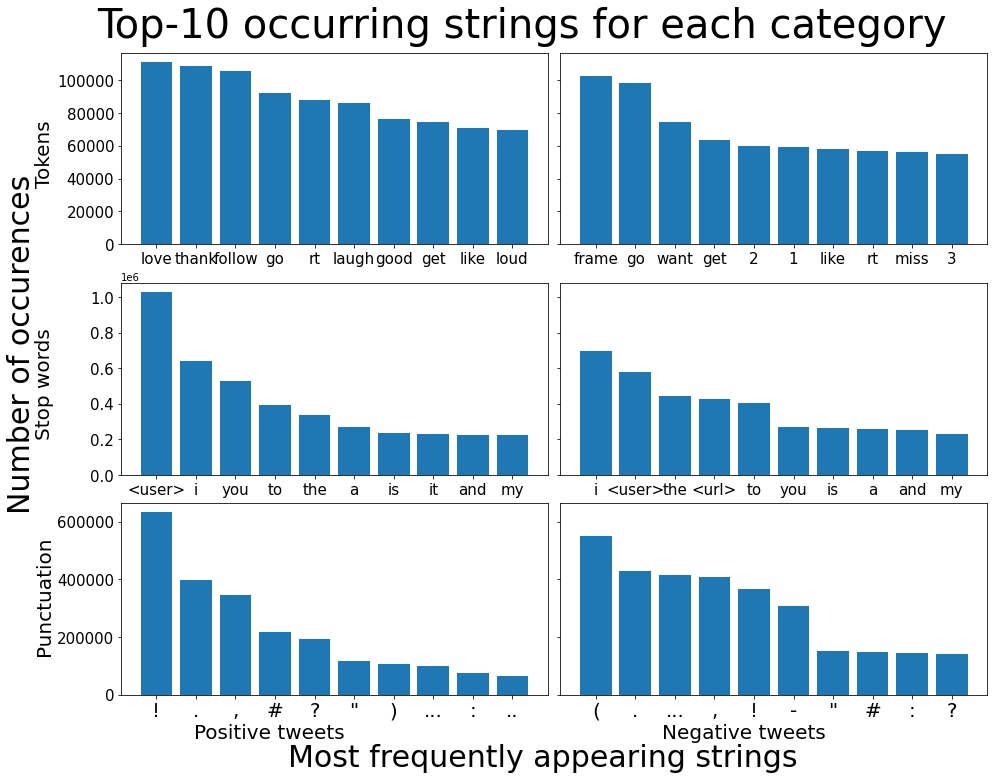

In [63]:
to_plot = [pos_no_punct_sw, pos_sw, pos_punct, neg_no_punct_sw, neg_sw, neg_punct]

#to_plot = {pos_no_punct_sw : 'Words without punctuation nor stop wods', pos_sw :}

fig, ax = plt.subplots(3, 2, figsize = (13, 10), sharey = 'row', constrained_layout =True)

x = np.arange(10)

for i in range(2):
    for j in range(3):
        names = to_plot[i*3+j].index
        values = to_plot[i*3+j].nbr
        ax[j, i].bar(names, values)
        ax[j, i].tick_params(axis = 'y', labelsize =15 )      
        if j==2:
            ax[j, i].tick_params(axis = 'x', labelsize=20)
        else :
            ax[j, i].tick_params(axis = 'x', labelsize =15 )

#plt.rc('xtick', labelsize = 30)
fig.suptitle("Top-10 occurring strings for each category", fontsize = 40)
fig.text(-0.05,0.3, "Number of occurences", rotation = 90, fontsize=30)
fig.text(-0.02,0.75, "Tokens", rotation = 90, fontsize=20)
fig.text(-0.02,0.40, "Stop words", rotation = 90, fontsize=20)
fig.text(-0.02,0.10, "Punctuation", rotation = 90, fontsize=20)
fig.text(0.15,-0.02, "Positive tweets", fontsize=20)
fig.text(0.65, -0.02, "Negative tweets", fontsize = 20)
fig.text(0.25, -0.06, "Most frequently appearing strings", fontsize=30)


